In [6]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [7]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Theft/CDI_Based/Intensity/CSV/Harris_With_Filter.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-7-6b6e63f4b6ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-7-6b6e63f4b6ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.186051,0.115734,0.105940,0.090340,0.067587,0.068618,0.043177,0.037379,0.098534,0.045211,...,0.043724,0.035154,0.034212,0.048864,0.103818,0.060057,0.095416,0.083675,0.118494,1
1,0.264520,0.245998,0.179000,0.202320,0.551074,0.155879,0.107621,0.191412,0.165450,0.140616,...,0.151866,0.191549,0.202102,0.187331,0.149520,0.148131,0.176308,0.093307,0.099042,1
2,0.505563,0.445211,0.443958,0.388431,0.354374,0.279811,0.251286,0.315936,0.218632,0.219587,...,0.086878,0.124352,0.173191,0.179403,0.338928,0.179622,0.075383,0.076057,0.145270,1
3,0.129045,0.085439,0.137238,0.102048,0.135956,0.185653,0.136973,0.127998,0.153883,0.113305,...,0.101442,0.135760,0.101806,0.120929,0.143993,0.084423,0.091170,0.134081,0.093282,1
4,0.055969,0.040589,0.023734,0.024738,0.052652,0.059079,0.057321,0.046508,0.036479,0.033322,...,0.024607,0.029323,0.027043,0.046598,0.043938,0.026282,0.027995,0.027177,0.023622,1


In [8]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [9]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.75
              precision    recall  f1-score   support

          -1       0.85      0.84      0.84       123
           1       0.35      0.38      0.37        29

    accuracy                           0.75       152
   macro avg       0.60      0.61      0.61       152
weighted avg       0.76      0.75      0.75       152



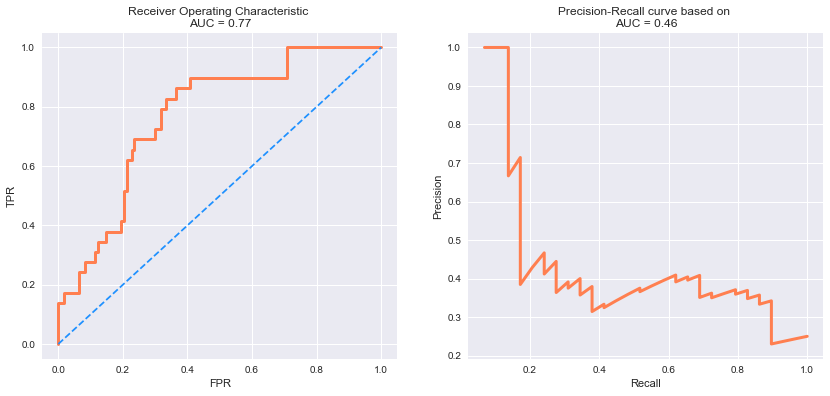

In [10]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()